In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import simulations
from functools import partial

## Our model (sum of exponents multiplied by velocity)

Current version of our model without wind is:
$$\dot{v_{i}}=A_{i}\Big[1-\frac{v_{i}}{V_{i}}-\frac{v_{i}}{\kappa}\cdot \sum_{0\leq j <i}K_{j}\exp\Big(\frac{x_{i}-x_{j}}{\omega}\Big)\Big]$$

### Situation 1: each drone starts with its' optimal velocity, drones are sorted according to their maximal velocities. Each drone has the same K=1 and A=0.5.

In [5]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([5,4,3,2,1])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [6]:
t, v = simulations.euler(initial_time=0, end_time=8, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,5,4,3,2,1]), derivative=d)

<IPython.core.display.Javascript object>


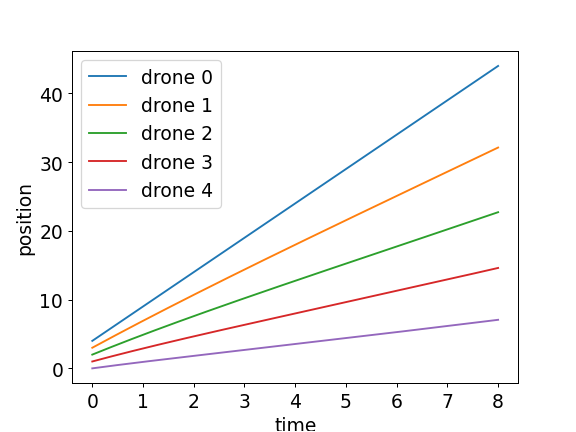

In [7]:
for i in range(5):
    plt.plot(t, v[:,i], label = 'drone ' + str(i))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("time",fontsize=15)
plt.ylabel("position",fontsize=15)
plt.legend(fontsize=15)
plt.show()

### Situation 2: each drone starts with its' maximal velocity, but drones are not sorted according to their maximal velocities. Each drone has the same K=1 and A=0.5.

In [8]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([1,2,3,4,5])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [9]:
t, v = simulations.euler(initial_time=0, end_time=8, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,1,2,3,4,5]), derivative=d)

<IPython.core.display.Javascript object>


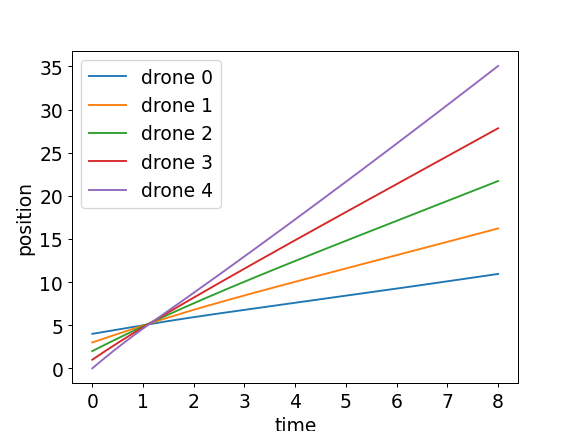

In [10]:
for i in range(5):
    plt.plot(t, v[:,i], label = 'drone ' + str(i))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("time",fontsize=15)
plt.ylabel("position",fontsize=15)
plt.legend(fontsize=15)
plt.show()

### Situation 3: first drone has K>>kappa and is very slow.

In [11]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([0.01,2,3,4,5])
kap = 10
K=np.array([100,1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [12]:
t, v = simulations.euler(initial_time=0, end_time=30, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,0.01,2,3,4,5]), derivative=d)

<IPython.core.display.Javascript object>


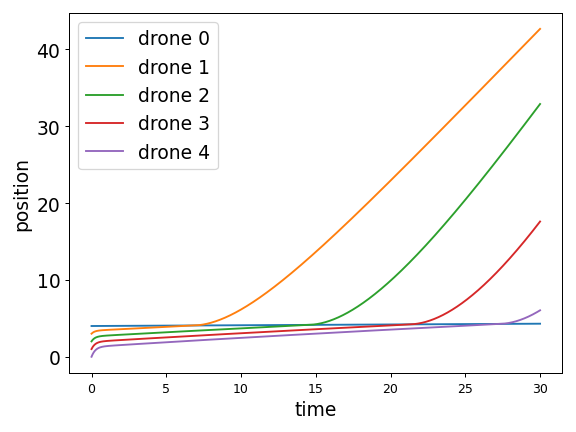

In [13]:
for i in range(5):
    plt.plot(t, v[:,i], label = 'drone ' + str(i))
plt.yticks(fontsize=15)
plt.xlabel("time",fontsize=15)
plt.ylabel("position",fontsize=15)
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

### Situation 4: several drones have the same starting position and zero velocity, they are the same except for maximum acceleration.

In [14]:
A = np.array([10,5,1,0.5,0.1])
opt = np.array([30,30,30,30,30])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [15]:
t, v = simulations.euler(initial_time=0, end_time=30, number_of_points=1000000, initial_value=np.array([0,0,0,0,0,0,0,0,0,0]), derivative=d)

<IPython.core.display.Javascript object>


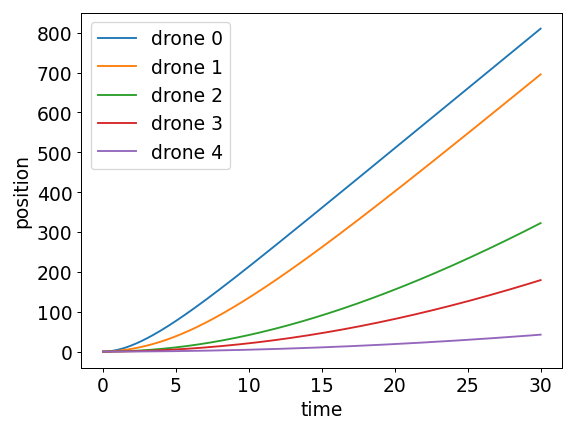

In [16]:
for i in range(5):
    plt.plot(t, v[:,i], label = 'drone ' + str(i))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("time",fontsize=15)
plt.ylabel("position",fontsize=15)
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

### Situation 5: some complicated situation with lots of overtaking.

In [17]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([7,10,3,5,2])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [18]:
t, v = simulations.euler(initial_time=0, end_time=100, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,7,3,15,0,25]), derivative=d)

<IPython.core.display.Javascript object>


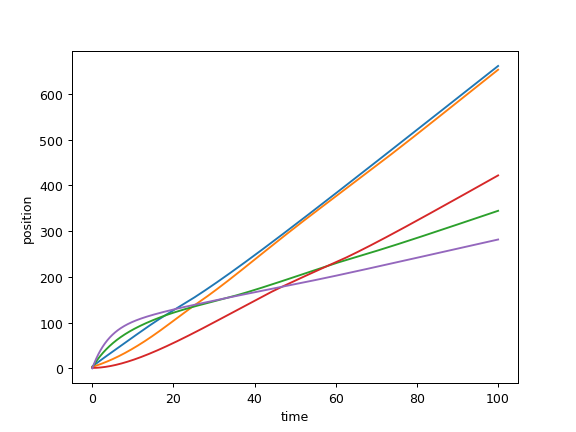

In [19]:
for i in range(5):
    plt.plot(t, v[:,i])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Situation 6: ,,stationary'' state

In [20]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([1,2,2,2,2])
kap = 10
K=np.array([50,50,50,50,50])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [21]:
t, v = simulations.euler(initial_time=0, end_time=200, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,1,2,2,2,2]), derivative=d)

<IPython.core.display.Javascript object>


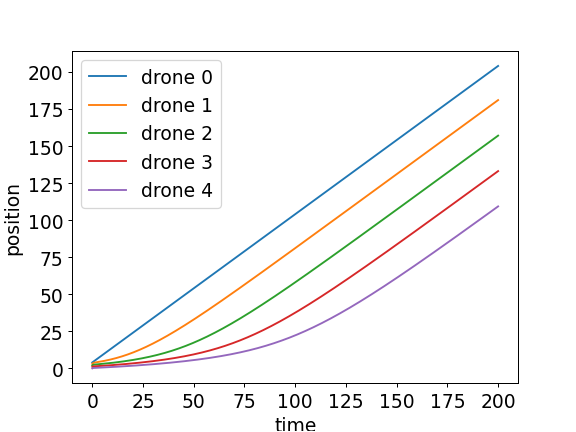

In [22]:
for i in range(5):
    plt.plot(t, v[:,i], label = 'drone ' + str(i))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("time",fontsize=15)
plt.ylabel("position",fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [23]:
from textwrap import wrap

<IPython.core.display.Javascript object>


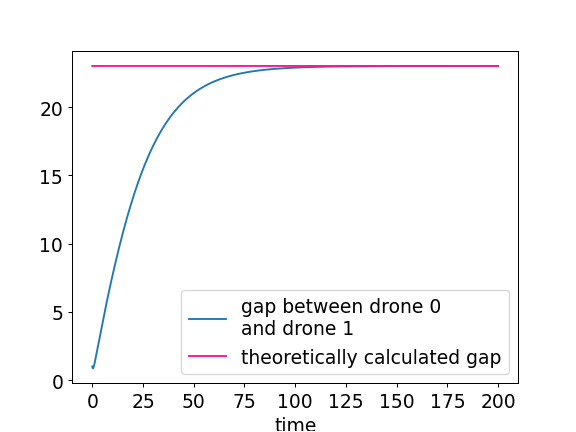

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 [Text(0, -5.0, '−5'),
  Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25')])

In [24]:
fig, ax = plt.subplots()
ax.plot(t,v[:,0]-v[:,1], label='\n'.join(wrap('gap between drone 0 and drone 1',20)))
plt.plot(t,om*np.log((opt[0]/kap)*K[0]*np.exp((v[:,0]-v[:,0])/om)/(1-opt[0]/opt[1])), color='deeppink', label='theoretically calculated gap')
leg = ax.legend(fontsize=15)
plt.xlabel('time',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

<IPython.core.display.Javascript object>


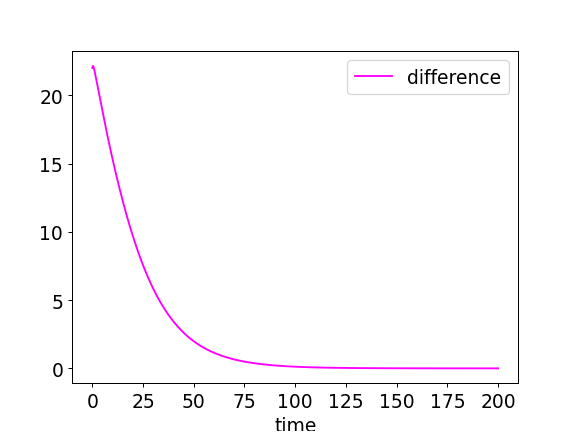

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 [Text(0, -5.0, '−5'),
  Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25')])

In [25]:
fig, ax = plt.subplots()
plt.plot(t,om*np.log((opt[0]/kap)*K[0]*np.exp((v[:,0]-v[:,0])/om)/(1-opt[0]/opt[1]))-v[:,0]+v[:,1], color='fuchsia', label='\n'.join(wrap('difference',20)))
leg = ax.legend(fontsize=15)
plt.xlabel('time',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [27]:
# import visualisations
# visualisations.visualise(t,v)

### Situation 7: every static obstacle will be passed by a moving vehicle in finite time.

In [28]:
A = np.array([0.5,0])
opt = np.array([1,1e-10])
kap = 10
K=np.array([1,100])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [29]:
t, v = simulations.euler(initial_time=0, end_time=50, number_of_points=1000000, initial_value=np.array([0,5,1,0]), derivative=d)

<IPython.core.display.Javascript object>


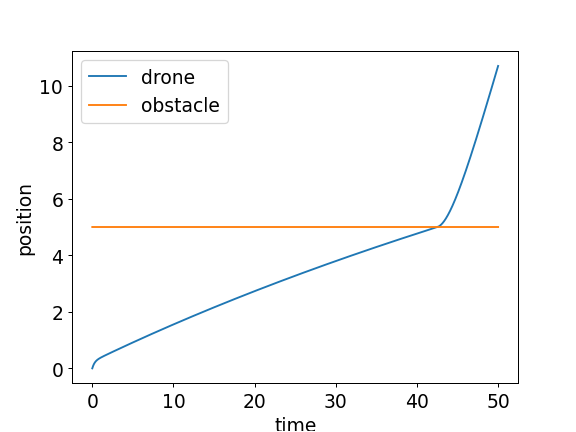

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, -2.0, '−2'),
  Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12')])

In [30]:
fig, ax = plt.subplots()
ax.plot(t,v[:,0], label='drone')
plt.plot(t, v[:,1], label='obstacle')
leg = ax.legend(fontsize=15)
plt.xlabel('time',fontsize=15)
plt.ylabel('position',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [12]:
import visualisations

<IPython.core.display.Javascript object>


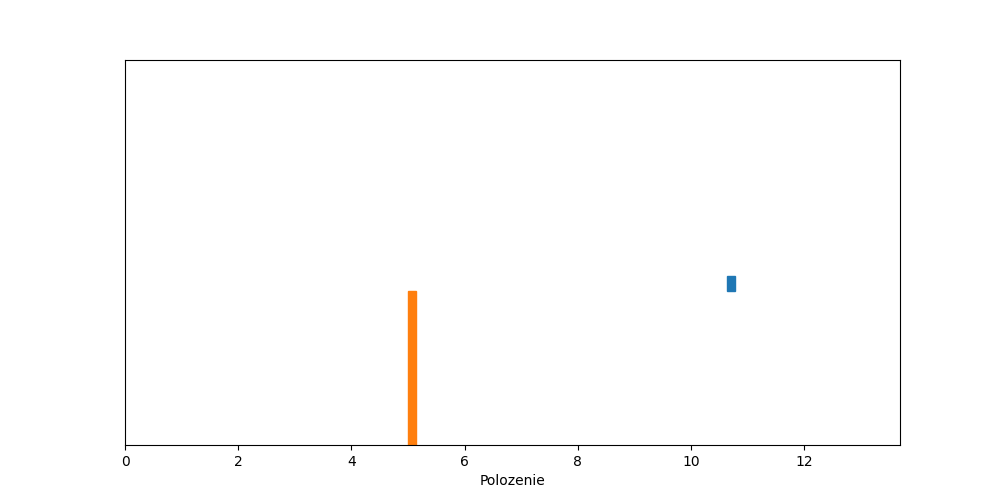

In [13]:
import visualisations
visualisations.visualise(t, v, filename='obstacle',drone_height=[2,0],drone_radius=[0.2,2],heightmax=5)

### Situation 8: 100 drones

In [107]:
A = np.concatenate([np.array([0,0,0,0,0]), np.repeat(4, 100)])

In [108]:
A = np.concatenate([np.array([0,0,0,0,0]), np.repeat(4, 100)])
opt = np.repeat(10, 105)
kap = 10
K = np.concatenate([np.array([100,100,100,100,100]), np.repeat(1, 100)])
om = 30
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [109]:
initial_positions = np.concatenate([np.array([270, 220, 170, 120, 70]), np.linspace(30, 0, 100)])
initial_velocities = np.concatenate([np.array([0, 0, 0, 0, 0]), np.repeat(10, 100)])
initial_value = np.concatenate([initial_positions, initial_velocities])

In [110]:
t, v = simulations.euler(initial_time=0, end_time=1400, number_of_points=1000000, initial_value=initial_value, derivative=d)
#around 15 minutes

<IPython.core.display.Javascript object>


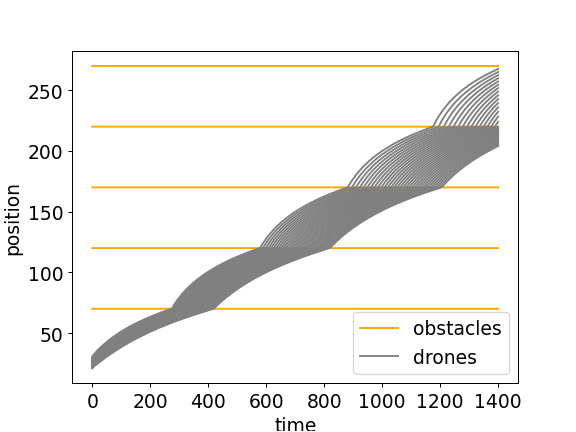

In [112]:
# obstacles
plt.plot(t, v[:,0], color='orange', label='obstacles')
for i in range(1, 5):
    plt.plot(t, v[:,i], color='orange')
    
# drones
plt.plot(t, v[:,5], color='grey', label='drones')
for i in range(6, 36):
    plt.plot(t, v[:,i], color='grey')
    
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("time",fontsize=15)
plt.ylabel("position",fontsize=15)
plt.legend(fontsize=15)
plt.show()

### Situation 9: 

We would like to show that it's possible to observe passing even if the blocking potential is positive, i.e.:

$$P_{0} = \frac{1}{V_{1}}-\frac{1}{V_{0}}+\frac{K_{0}}{\kappa} > 0$$

Let's set:

In [40]:
A = np.array([1, 100])
opt = np.array([1, 10])
kap = 100
K=np.array([99, 1])
om = 30
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

initial_velocity = np.array([1,100])
# gap = om*np.log((opt[0]/kap)*K[0]*np.exp((initial_velocity[0]-initial_velocity[0])/om)/(1-opt[0]/opt[1]))
initial_value = np.concatenate([np.array([0.5, 0]), initial_velocity])

Then we get:

$$P_{0} = \frac{1}{V_{1}}-\frac{1}{V_{0}}+\frac{K_{0}}{\kappa} =  \frac{1}{10}-\frac{1}{1}+\frac{99}{100} > 0$$

In [41]:
t, v = simulations.euler(initial_time=0, end_time=0.1, number_of_points=1000000, initial_value=initial_value, derivative=d)

<IPython.core.display.Javascript object>


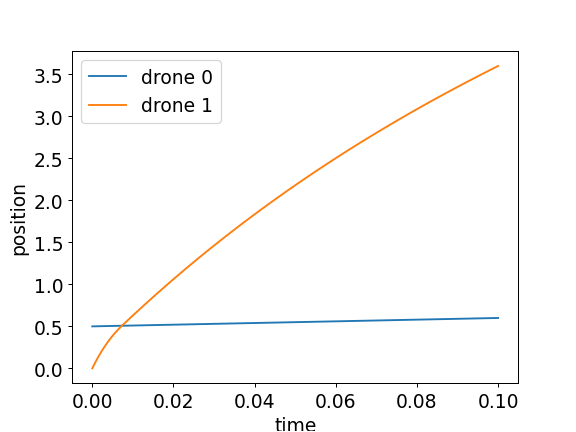

In [42]:
for i in range(2):
    plt.plot(t, v[:,i], label = 'drone ' + str(i))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("time",fontsize=15)
plt.ylabel("position",fontsize=15)
plt.legend(fontsize=15)
plt.show()
#plt.savefig('positive_potential_and_passing.png')

## Version with wind added

We simply add a component modelling wind-induced acceleration
$$\dot{v_{i}}=A_{i}\Big[1-\frac{v_{i}}{V_{i}}-\frac{v_{i}}{\kappa}\cdot \sum_{0\leq j <i}K_{j}\exp\Big(\frac{x_{i}-x_{j}}{\omega}\Big)\Big]+\frac{H_{i}}{m_{i}},$$
where $H_{i}$ is wind force for $i$-th drone. To compute this wind force we can use a formula:
$$H_{i}=\pm\frac{1}{2}\rho C_{d} A_{f}v^{2}_{wind}.$$

### Situation 1: each drone flies with its' optimal velocity, the fastest starts as the last one. In the first part of simulation (t<10) wind-induced acceleration equals -0.01, in the second part: -1.5.

$\textbf{Edit:}$ this situation doesn't make much sense, because the function modelling wind force is not continuous and we can't be guaranteed that the solution exists.

In [3]:
A = np.array([2,2,2,2,2])
opt = np.array([1,2,3,4,5])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
change_time=10
wind_force=[-0.01,-1.5]
m = np.array([1,1,1,1,1])
wrapped = partial(simulations.discontinuous_wind, change_time=change_time, wind_force=wind_force)
d = partial(simulations.derivative_with_wind,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om, model=simulations.model3, wind_function=wrapped, m=m)

In [4]:
t, v = simulations.euler(initial_time=0, end_time=20, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,1,2,3,4,5]), derivative=d)

<IPython.core.display.Javascript object>


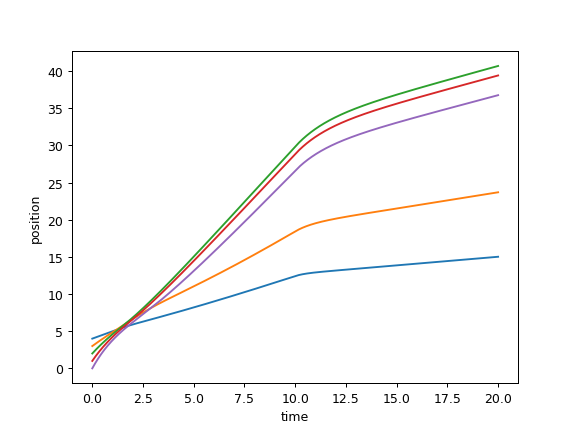

In [5]:
for i in range(5):
    plt.plot(t, v[:,i], label = 'drone ' + str(i))
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Situation 2: First drone has K>>kappa and is very slow. The others are faster and try to overtake. In the first part of simulation (t<5) wind-induced acceleration equals 1 and in the second part: -0.25.

$\textbf{Edit:}$ this situation doesn't make much sense, because the function modelling wind force is not continuous and we can't be guaranteed that the solution exists.

In [6]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([0.01,2,3,4,5])
kap = 10
K=np.array([100,1,1,1,1])
om = 10
change_time=5
wind_force=[1,-0.25]
m = np.array([1,1,1,1,1])
wrapped = partial(simulations.discontinuous_wind, change_time=change_time, wind_force=wind_force)
d = partial(simulations.derivative_with_wind,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,wind_function=wrapped,model=simulations.model3, m=m)

In [7]:
t, v = simulations.euler(initial_time=0, end_time=35, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,0.01,2,3,4,5]), derivative=d)

<IPython.core.display.Javascript object>


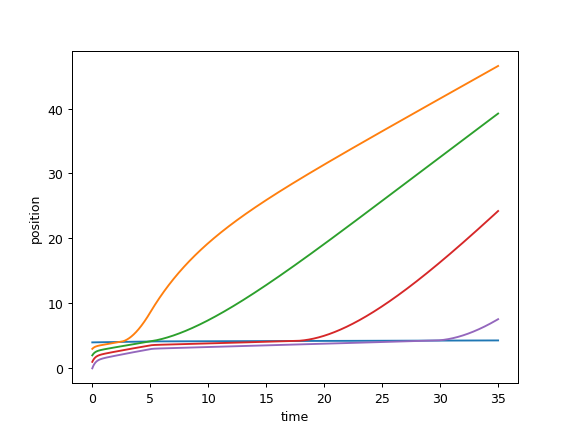

In [8]:
for i in range(5):
    plt.plot(t, v[:,i], label = 'drone ' + str(i))
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Situation 3: when wind blows, drones can be faster than their optimal velocity.

(Here we have a constant wind force, so the solution exists.)

In [9]:
A = np.array([0.5])
opt = np.array([3])
kap = 10
K=np.array([1])
om = 10
wind_force=5
m=np.array([1])
wrapped=partial(simulations.constant_wind, wind_force=wind_force)
d = partial(simulations.derivative_with_wind,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,wind_function=wrapped,model=simulations.model3, m=m)

In [10]:
t, v = simulations.euler(initial_time=0, end_time=5, number_of_points=1000000, initial_value=np.array([10,3]), derivative=d)

In [11]:
from textwrap import wrap

<IPython.core.display.Javascript object>


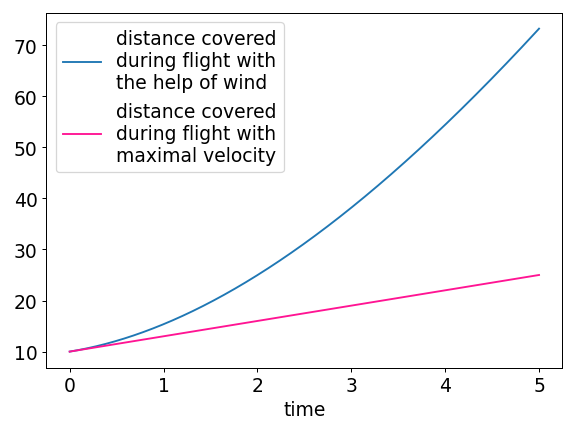

In [12]:
# plt.plot(t,v[:,0])
# plt.xlabel("time")
# plt.ylabel("position")
# plt.show()
fig, ax = plt.subplots()
ax.plot(t, v[:,0], label='\n'.join(wrap('distance covered during flight with the help of wind', 20)))
ax.plot(t, v[0,0]+opt[0]*t, color='deeppink', label='\n'.join(wrap('distance covered during flight with maximal velocity',20)))
leg = ax.legend(fontsize=15);
plt.xlabel('time',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

### Situation 4: when wind blows, drones can have negative velocity.

(Here we have a constant wind force, so the solution exists.)

In [13]:
A = np.array([0.5])
opt = np.array([4])
kap = 10
K=np.array([1])
om = 10
wind_force=-6
m=np.array([1])
wrapped=partial(simulations.constant_wind, wind_force=wind_force)
d = partial(simulations.derivative_with_wind,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,wind_function=wrapped,model=simulations.model3,m=m)

In [14]:
t, v = simulations.euler(initial_time=0, end_time=100, number_of_points=1000000, initial_value=np.array([10,4]), derivative=d)

<IPython.core.display.Javascript object>


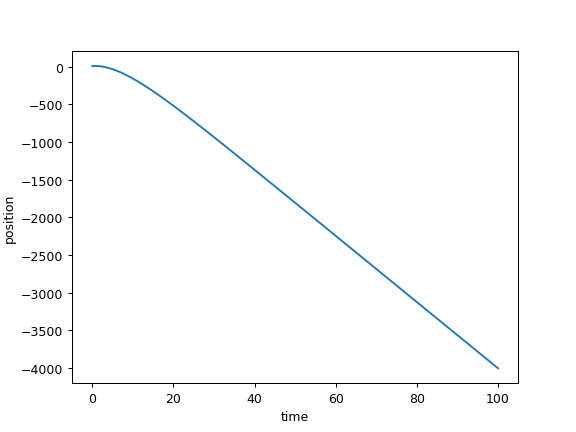

In [15]:
plt.plot(t,v[:,0])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Situation 5: negative velocity

In [16]:
A = np.array([2,4,9])
opt = np.array([4,4,4])
kap = 10
K=np.array([1,1,1])
om = 10
wind_force=-6
m=np.array([1,1,1])
wrapped=partial(simulations.constant_wind, wind_force=wind_force)
d = partial(simulations.derivative_with_wind,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,wind_function=wrapped,model=simulations.model3,m=m)

In [17]:
t, v = simulations.euler(initial_time=0, end_time=5, number_of_points=1000000, initial_value=np.array([2,1,0,4,4,4]), derivative=d)

<IPython.core.display.Javascript object>


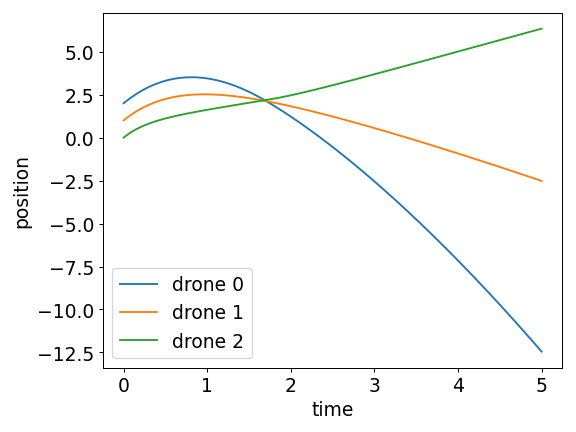

In [18]:
for i in range(3):
    plt.plot(t, v[:,i], label = 'drone ' + str(i))
plt.xlabel("time",fontsize=15)
plt.ylabel("position",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

In [19]:
# import visualisations
# visualisations.visualise(t, v, filename='wind3',drone_height=[1,2,3],drone_radius=[0.4,0.4,0.4],heightmax=5)